In [2]:
addpath ("../files")

## Función de rosenbrock

$ f : \mathbb{R}^2 \to \mathbb{R}$ 

$ f(x,y) = 100(y - x^2)^2 + (1 - x)^2$

In [1]:
%%file ../files/rosenbrock.m

function [fx] = rosenbrock(x)
%{
    Función de Rosenbrock: f: R^2 --> R cuyo mínimo local es muy 
    difícil de alcanzar por medio de los métodos de optimización.
    
    Input:
         x.- vector de longitud 2
    Output:
        fx.- número real con el valor de la función.
%}
    fx = 100*(x(2) - x(1)^2)^2 + (1 - x(1))^2;
end

Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/applied_analysis/Labs/files/rosenbrock.m'.


La testeamos en el punto 
$ x =  \begin{pmatrix} 1 \\ 2 \end{pmatrix}$

In [3]:
rosenbrock([0,0])

ans =  1


In [4]:
%%file ../files/fcuad.m

function [fx] = fcuad(x)
%{
    Función cuadrática f: Rn --> R

    Input:
        x  .- vector de longitud n
    Output:
        fx .- número real
%}
    fx = norm(x)^2 +1;
end

Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/Applied_analysis/Labs/files/fcuad.m'.


In [5]:
%%file ../files/funcuad.m

function [fx] = funcuad(x)
%{
    Función cuadrática 
        f(x) = (1/2)*x'*A*x + b'*x + c
        
    Donde 
        x es un vector de dimensión cuatro,
        A es la matriz de Pascal de dimensión cuatro,
        b es el vector columna de unos de dimensión cuatro,
        c = 1.
    
    El único mínimo de f(x) es en el vector 
        x* = [1 0 0 0]'.
        
    Input:
        x  .- vector de longitud 4
    Output:
        fx .- número real
%}

    A = [1 1 1 1; 1 2 3 4; 1 3 6 10;1 4 10 20];
    b = [ 1 1 1 1]';                              
    c = 1;                                        

    fx = (1/2)*x'*A*x + b'*x + c;  
end

Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/Applied_analysis/Labs/files/funcuad.m'.


In [2]:
%%file ../files/gradiente.m

function  [gfx] = gradiente(fname, x, h = 1.e-06)

%{
    Aproximacion del gradiente por diferencias hacia adelante 
    de una funcion  de R^n a R.
    
    Input:
        fname .- cadena con el nombre de la funcion.
        x     .- vector columna de dimension n.

    Output:

        gfx   .- vector columna de dimension n, 
                 es la aproximacion al gradiente en x.
%}

    n = length(x);
    
    fx = feval(fname,x);                            
    gfx = zeros(n,1);   
    xt = x;
    
    for i = 1:n
        xt(i) = xt(i) + h;
        fxh = feval(fname, xt);
        gfx(i) = (fxh - fx)/h;
        xt(i) = x(i);
    end
end

Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/applied_analysis/Labs/files/gradiente.m'.


In [7]:
%%file ../files/plot_surface.m

function  [gfx] = plot_surface(fname, x_lim = [.8; 1.2], y_lim = [.8,1.2], n=50)

%{
% Grafica la función de Rosenbrock:
%
%  f(x) = 100*(x(2) - x(1)^2)^2 + (1 - x(1))^2
%
% con único mínimo en x* = [1, 1]'.
% La graficación es en la caja [0.8, 1.2]x[0.8, 1.2].
    
    Input:
        fname .- cadena con el nombre de la funcion.
        x     .- vector columna de dimension n.

    Output:

        gfx   .- vector columna de dimension n, 
                 es la aproximacion al gradiente en x.
%}

    x = linspace(x_lim(1),x_lim(2),n)';
    y = linspace(y_lim(1),y_lim(2),n)';
    
    [X,Y]= meshgrid(x,y);
    Z = zeros(n);


    for i = 1:n
        a = x(i);
        for j = 1:n
            Z(i,j) = feval(fname,[a,y(j)]');
        end
    end

    subplot (2, 1, 1)
    mesh(X,Y,Z);
    title(fname )
    axis square
    xlabel('X')
    ylabel('Y')
    
    subplot (2, 1, 2)
    contour(X,Y,Z,200)
    axis square
    hold on
    plot(1,1,'dr','Linewidth',5)
   

end

Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/Applied_analysis/Labs/files/plot_surface.m'.


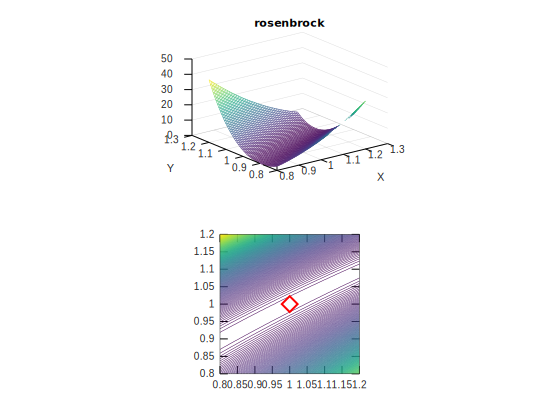

In [8]:
plot_surface('rosenbrock')

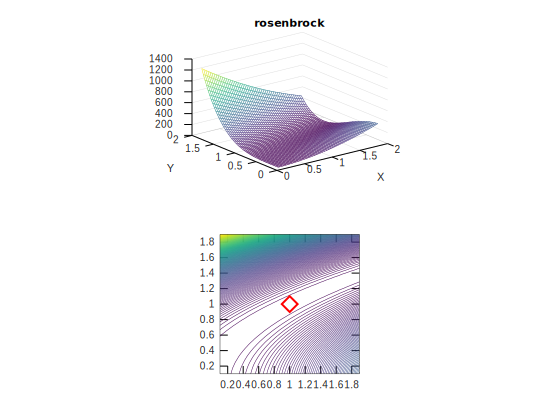

In [9]:
plot_surface('rosenbrock',x_lim=[.1,1.9]',y_lim=[.1,1.9]')

In [10]:
%%file ../files/plot_descent_curve.m

function  [gfx] = plot_descent_curve(a,b, fname = 'rosenbrock', x = [1.5; 1.5])

%{
    Ejemplo de la curva en R siguiendo el vector -g en la función de
    Rosenbrock en el punto (1.5, 1.5].
    
    Input:
        fname .- cadena con el nombre de la funcion.
        x     .- vector columna de dimension n.

    Output:

        gfx   .- vector columna de dimension n, 
                 es la aproximacion al gradiente en x.
%}

    g =  gradiente(fname,x);
    t = linspace(0,b,50)';

    for k = 1:50
        y(k) = feval(fname, x - t(k)*g);
    end

    y = y';

    plot(t,y,'--b', 'Linewidth',3)
    title(['Curva de descenso en el intervalo [',num2str(a),', ',num2str(b),']' ])
    xlabel('Eje T')
    ylabel('Valores de f(x -t g)')
end

Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/Applied_analysis/Labs/files/plot_descent_curve.m'.


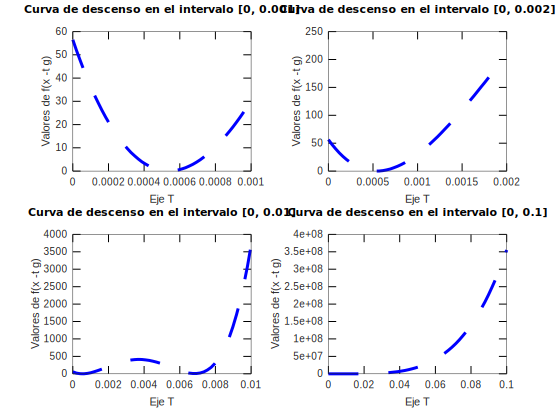

In [11]:
subplot (2, 2, 1)
plot_descent_curve(0,.001)
subplot (2, 2, 2)
plot_descent_curve(0,.002)
subplot (2, 2, 3)
plot_descent_curve(0,.01)
subplot (2, 2, 4)
plot_descent_curve(0,.1)

In [15]:
%%file ../files/descoor.m

function [x,iter,W] = descoor(fname,x,method='max',tol=1.e-05,maxiter = 1000,maxjter = 6,c1 = 0.1)

%{
    Método para aproximar mínimos locales para una función
    f: R^n --> R  dos veces continuamente diferenciable,
    usando los métodos de descenso:
        1. Por coordenadas
        2. Máximo descenso
    Input:
        
        fname.- cadena de caracteres con el nombre de la función a minimizar.
        x    .- vector n-dimensional.
    
    Output:
        x    .- vector n-dimensional con la aproximación al mínimo local.
        iter .- contador con el número final de iteraciones externas.
%}
    

    iter = 0;        

    n  = length(x);
    g  = gradiente(fname,x);
    ng = norm(g);
    W  = [x];  
    
    %-----------------------------------------------------------------------
    % parte iterativa
    while ( ng > tol && iter < maxiter)
        
        if (strcmp(method,'coor') )
            [a, k] = max(abs(g));
             b = g(k);
             p = zeros(n,1);
             if (b > 0)
                 p(k) = -1;
             else
                 p(k) = 1;
             end  
        end

        if (strcmp(method,'max'))
            p = -g;
        end

        %---------------------------------------------
        alfa  = 1;              % paso completo
        xt = x + alfa*p;
        % busqueda de línea
        f  = feval(fname,x);  % valor de la función
        f1 = feval(fname, xt);% valor de la función en el punto de prueba
        s  = p'*g;            % derivada direccional
        jter = 0;             % iteraciones internas
        
        while( (f1>f+alfa*c1*s) && jter < maxjter)  % búsqueda de línea
           alfa = alfa/2;
           xt = x + alfa*p;
           f1 = feval(fname, xt);% valor de la función en el punto de prueba
           jter = jter +1;
        end   
        %--------------------------------------
        
        x = x + alfa*p;
        W = [W x];
        g = gradiente(fname,x);
        ng = norm(g);
        iter = iter + 1; 
    end

end



Created file '/Users/sergio_arnaud/Documents/ITAM/8vo/Applied_analysis/Labs/files/descoor.m'.


In [5]:
[x,iter,W] = descoor('rosenbrock',[1.5,1.5]',c1='coor');
x
[x,iter,W] = descoor('fcuad',[2000,2000,2000,2000]',method='coor');
x

[x,iter,W] = descoor('rosenbrock',[1.5,1.5]',method='max');
x
[x,iter,W] = descoor('fcuad',[2000,2000,2000,2000]',method='max');
x

x =

   1.2344
   1.5000

x =

   1750
   1750
   1750
   1750

x =

   6.0446e+29
   2.6915e+06

x =

  -0.00000050005
  -0.00000050005
  -0.00000050005
  -0.00000050005

